###### Definition of problem (as per given problem statement with additional views)
 1. Company wants to understand the factors/variables affecting the demand for their shared electric cycles in the Indian market.
 2. How well those variables describe the electric cycle demands

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,shapiro,levene,f_oneway
from matplotlib.ticker import PercentFormatter
import calendar
from calendar import month_name

In [67]:
data=pd.read_csv("D:\\Scaler\\Projects\\Indian micro mobility\\original_data.csv")

In [4]:
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


######  Lets do the following as part of  Exploratory Data Analysis.
    Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
    Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
    Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
    Illustrate the insights based on EDA
    Comments on range of attributes, outliers of various attributes
    Comments on the distribution of the variables and relationship between them
    Comments for each univariate and bivariate plots

In [11]:
data.shape

(10886, 12)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
# Changing required datatypes.
data["datetime"]=pd.to_datetime(data["datetime"])
data["season"]=data["season"].astype(str)  # As season is a categorical variable.
data["holiday"]=data["holiday"].astype(str) # As holiday is a categorical variable.
data["workingday"]=data["workingday"].astype(str) # As workingday is a categorical variable.
data["weather"]=data["weather"].astype(str) # As weather is a categorical variable.

In [4]:
# Replacing weather numbers by weather names.
data.loc[data["season"]=="1","season"]="spring"
data.loc[data["season"]=="2","season"]="summer"
data.loc[data["season"]=="3","season"]="fall"
data.loc[data["season"]=="4","season"]="winter"
data["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [5]:
data["datetime"].dtype

dtype('<M8[ns]')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


C:\Users\Dell\AppData\Local\Temp\ipykernel_10248\61684406.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2=data2.groupby("datetime")["casual","registered","count"].sum()


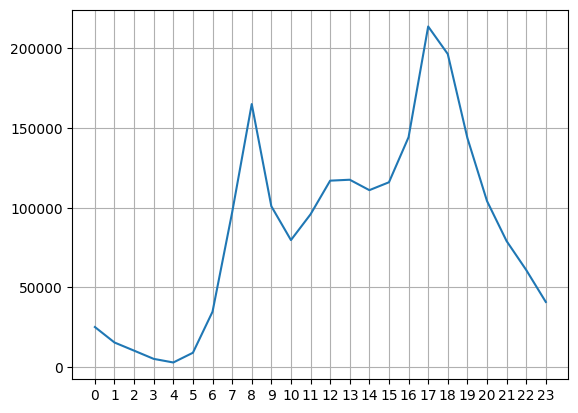

In [7]:
# No. of total users according to time of day.
data2=data[["datetime","casual","registered","count"]].copy()
data2.datetime=data2.datetime.dt.hour
data2=data2.groupby("datetime")["casual","registered","count"].sum()
data2=data2.reset_index()
plt.plot(data2["datetime"],data2["count"])
plt.xticks(np.arange(0, 24, step=1))
plt.grid()

# Insight : Number of users starts increasing at 4 in the morning and continues increasing until 
# ... 8. Thereafter it decreases till 10. It again starts increasing and making a peak at 5 pm 
# ... in the evening and tehreafter decreases further.

###### 
    Number of users starts increasing at 4 in the morning and continues increasing until 8. Thereafter it decreases till 10. It again starts increasing and making a peak at 5 pm in the evening and tehreafter decreases further.

C:\Users\Dell\AppData\Local\Temp\ipykernel_10248\656548658.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1=data1.groupby("year_month")["casual","registered","count"].sum()


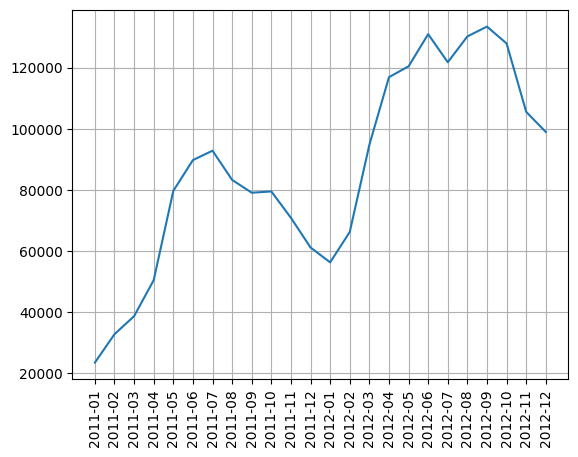

In [36]:

data1=data[["datetime","casual","registered","count"]].copy()
data1['year_month'] = data1["datetime"].dt.strftime('%Y-%m') # Converting datetime to year and month values.
data1.drop(["datetime"],axis=1)
data1=data1.groupby("year_month")["casual","registered","count"].sum()
data1=data1.reset_index()
plt.plot(data1["year_month"],data1["count"])
plt.xticks(rotation=90)
plt.grid()

###### 
    A gradual decline in total users count is observed in the last 3 months of both the years.

In [8]:
data.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


    1. Here Mean and median for temp, atemp, humidity and windspeed are almost same suggesting that the distribution is almost symmetrical i.e could be normally distributed as well. 
    2. For casual, registered and count variable, mean is higher than the median suggesting that plot is positively skewed.

###### > Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

In [17]:
data.datetime.max()-data.datetime.min() # This shows that we have data for 718 days

Timedelta('718 days 23:00:00')

In [27]:
# Function to create charts and add labels to bars.
def create_chart(data_column,chart_title,x_label,y_label): # Function defined 
    data_column_counts=data[data_column].value_counts() # To calculate number of occurences for each
    # categorical variable for a particular column in the dataset. 
    data_column_counts.plot(kind="bar") # Plotting a bar chart for the calculated variable. 
    plt.title(chart_title) # Assigning a chart title.
    plt.xlabel(x_label) # Assigning a title to x axis.
    plt.ylabel(y_label) # Assigning a label to y axis.
    for i in range(len(data_column_counts.index)): # Function to add numerical value labels to bars.
        plt.text(i,data_column_counts.values[i],format(data_column_counts.values[i],","))


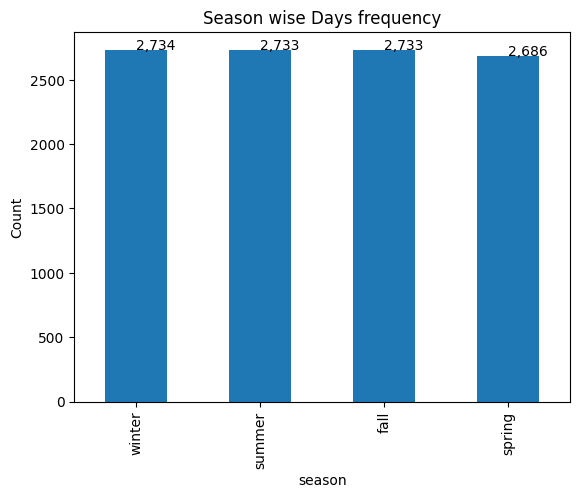

In [42]:
create_chart("season","Season wise Days frequency","season","Count")

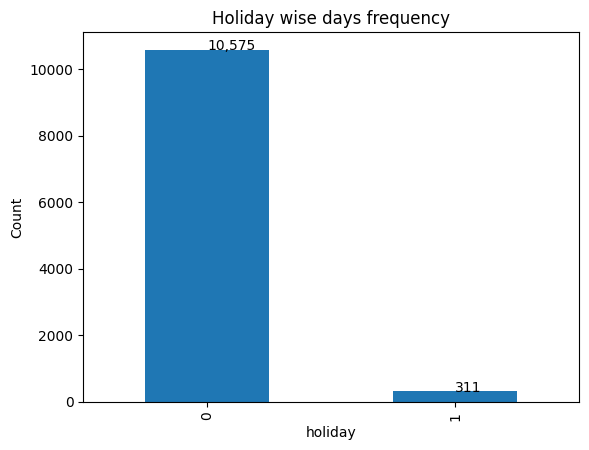

In [31]:
create_chart("holiday","Holiday wise days frequency","holiday","Count")
# 1 - Holiday
# 2 - Not a holiday

    There are a total of 10,575 non-holiday days vs only 311 working days points.

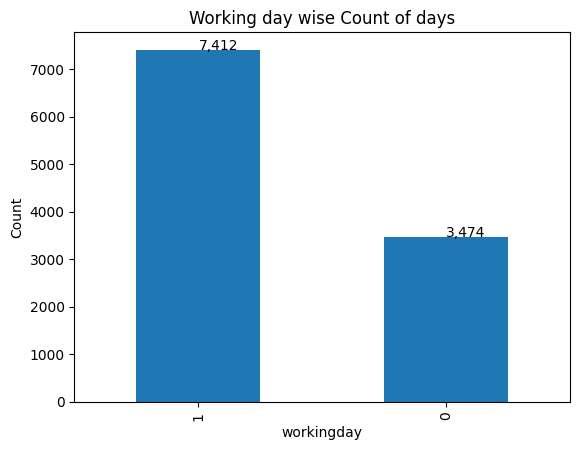

In [32]:
create_chart("workingday","Working day wise Count of days","workingday","Count")

There are 7412 data points for working day vs 3474 data points for non-working days. Suggesting that a significant portion of our users are daily work commuters.

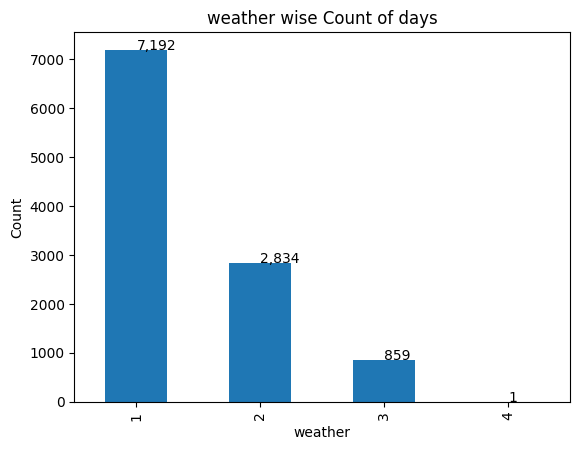

In [33]:
create_chart("weather","weather wise Count of days","weather","Count")

    1: Clear, Few clouds, partly cloudy, partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

###### Maximum rides take place when weather is Clear, Few clouds or partly cloudy.

In [76]:
data.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,spring,0,0,1,9.84,14.395,81,0.0,3,13,16


(array([  9.,  16., 104., 253., 335., 542., 513., 741., 880., 655., 684.,
        576., 689., 798., 593., 856., 618., 780., 541., 300., 210.,  99.,
         80.,  13.,   1.]),
 array([ 0.82  ,  2.4272,  4.0344,  5.6416,  7.2488,  8.856 , 10.4632,
        12.0704, 13.6776, 15.2848, 16.892 , 18.4992, 20.1064, 21.7136,
        23.3208, 24.928 , 26.5352, 28.1424, 29.7496, 31.3568, 32.964 ,
        34.5712, 36.1784, 37.7856, 39.3928, 41.    ]),
 <BarContainer object of 25 artists>)

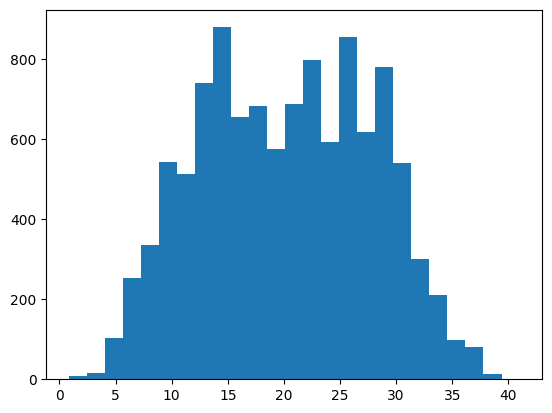

In [21]:
# Histogram showing Temperature frequency.
plt.hist(data["temp"],bins=25)

(array([  44.,  406., 1243., 1679., 1790., 1962., 1832., 1425.,  440.,
          65.]),
 array([ 0.76  ,  5.2295,  9.699 , 14.1685, 18.638 , 23.1075, 27.577 ,
        32.0465, 36.516 , 40.9855, 45.455 ]),
 <BarContainer object of 10 artists>)

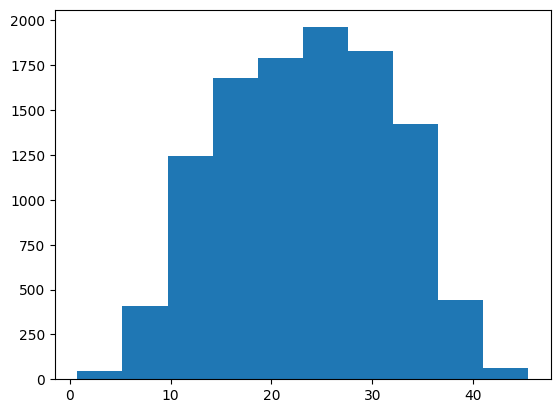

In [304]:
#Histogram showing feeling temperatue frequency.
plt.hist(data["atemp"])

(array([ 22.,   1.,   5.,  40., 118., 246., 401., 638., 828., 899., 919.,
        923., 801., 947., 894., 842., 825., 851., 536., 150.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

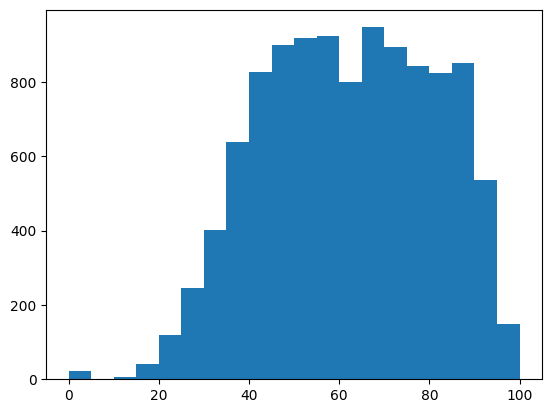

In [26]:
# Histogram showing humidity frequency.
plt.hist(data["humidity"],bins=20)

(array([1.313e+03, 4.083e+03, 2.827e+03, 1.540e+03, 6.960e+02, 2.800e+02,
        1.070e+02, 3.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

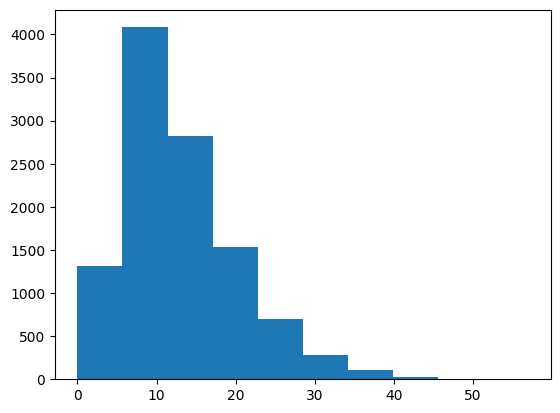

In [306]:
# Histogram showing windspeed frequency.
plt.hist(data["windspeed"])

(array([7447., 1807.,  805.,  322.,  203.,  127.,   98.,   48.,   18.,
          11.]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <BarContainer object of 10 artists>)

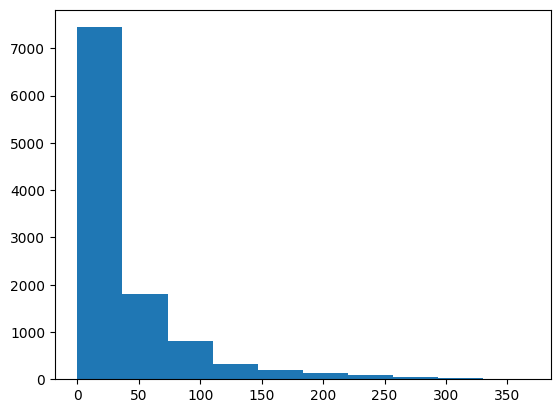

In [307]:
# Histogram showing casual users frequency.
plt.hist(data["casual"])

(array([4459., 2694., 1775.,  873.,  461.,  262.,  142.,  126.,   81.,
          13.]),
 array([  0. ,  88.6, 177.2, 265.8, 354.4, 443. , 531.6, 620.2, 708.8,
        797.4, 886. ]),
 <BarContainer object of 10 artists>)

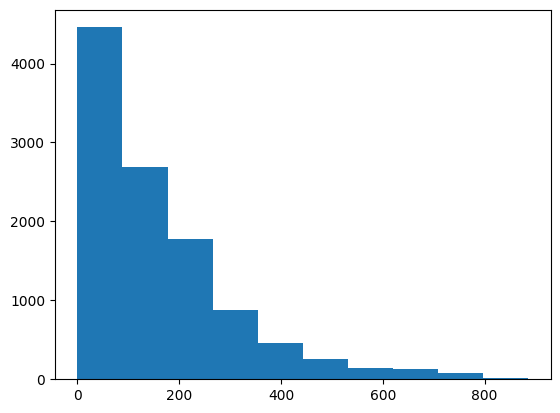

In [308]:
# Histogram showing registered users frequency.
plt.hist(data["registered"])

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

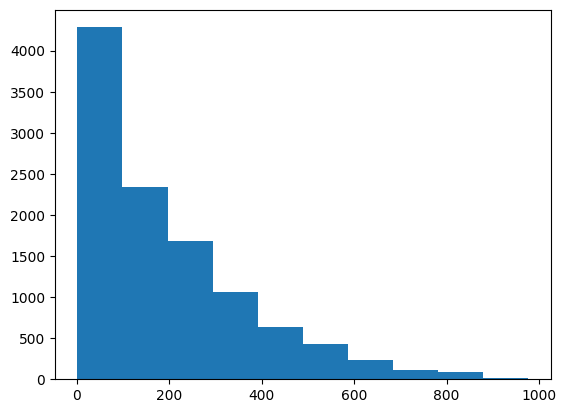

In [309]:
# Histogram for count of total users for a day
plt.hist(data["count"])

###### Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count. 
###### 

In [311]:
data.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,month_name
0,2011-01-01,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,Jan


In [37]:
# Bivariate Analysis - Product_Category wise Purchase Amount
def combo_chart(x):
    x1=data.groupby(x)["count"].sum().sort_values(ascending=False).to_frame()
    x1.reset_index(inplace=True)
    x1["Cum%age of Total"]=round((x1["count"].cumsum()/x1["count"].sum())*100,2)
    #print(x1)
    #x1.reset_index(inplace=True)

    #create basic bar plot
    fig, ax = plt.subplots()
    ax.bar(x1[x], x1["count"], color="steelblue")
    c=x+" wise count"
    plt.title(c)
    plt.xlabel(x)
    plt.ylabel("count ")
    ax.grid()
    #print(x1[x])

    #add cumulative percentage line to plot
    ax2 = ax.twinx()
    ax2.plot(x1[x], x1["Cum%age of Total"], color="red", marker="D", ms=4)
    ax2.yaxis.set_major_formatter(PercentFormatter())

    #specify axis colors
    ax.tick_params(axis='y', colors="steelblue")
    ax2.tick_params(axis='y', colors="red")
    #display Pareto chart
    plt.show()


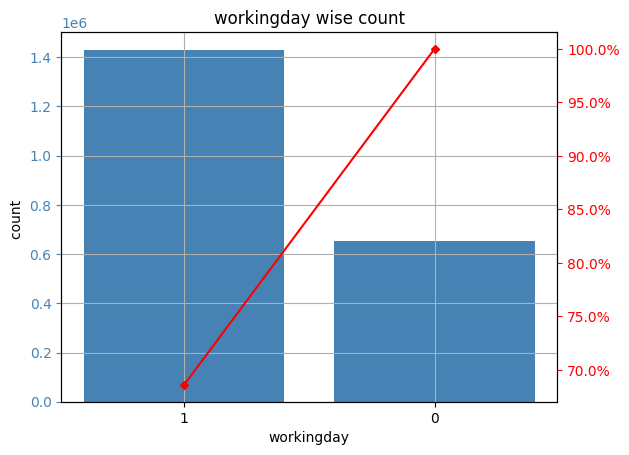

In [38]:
# Working Day wise distribution of total users
combo_chart("workingday")

    Create bar chart showing distribution of various types of users.

In [49]:
def bar_chart(column_name):
    dgw=data.groupby(column_name)[["casual","registered","count"]].sum()
    dgw.reset_index(inplace=True)
    dgw.plot(kind="bar")

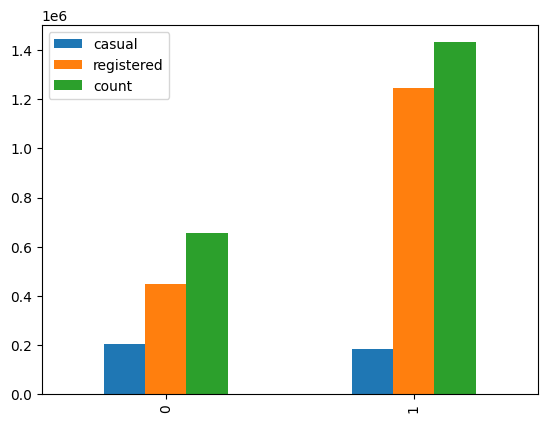

In [51]:
bar_chart("workingday")

<AxesSubplot: >

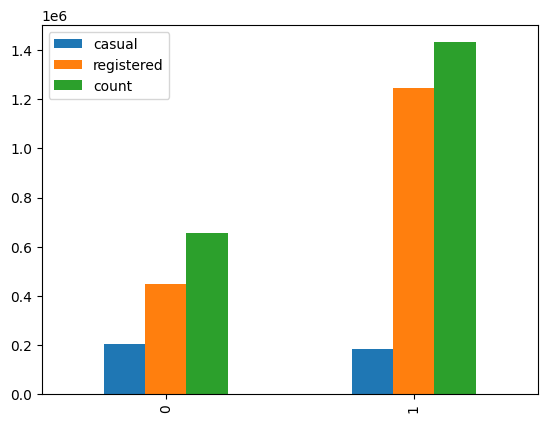

In [314]:
# Working Day wise distribution of casual, registered and total users
dgw=data.groupby("workingday")[["casual","registered","count"]].sum()
dgw.reset_index(inplace=True)
dgw.plot(kind="bar")

###### Insights : About 70% of bikes are used on working day. and maximum are registered users.

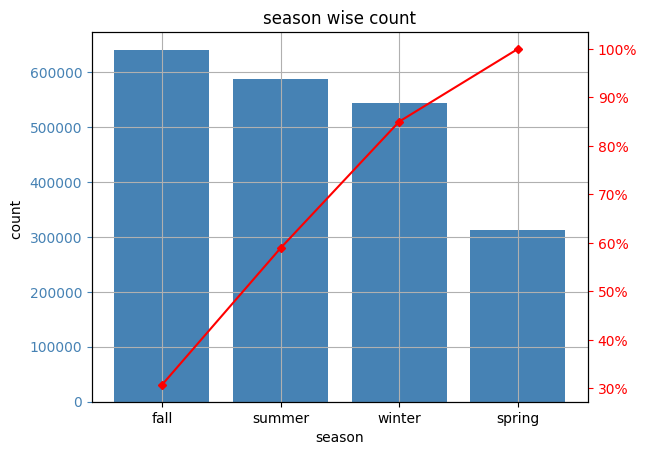

In [39]:
# Season wise distribution of total users
combo_chart("season")

    We see that Maximum number of rides are made in fall season. and minimum in spring season. Fall,summer and winter have approx 85% of total rides. and maximum are regsitered users.

<AxesSubplot: xlabel='season'>

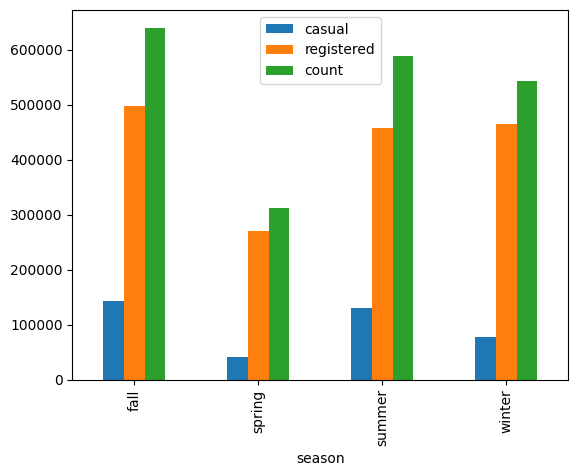

In [64]:
dgw=data.groupby("season")[["casual","registered","count"]].sum()
dgw.reset_index(inplace=True)
dgw
dgw.plot(kind="bar",x="season",y=["casual","registered","count"])

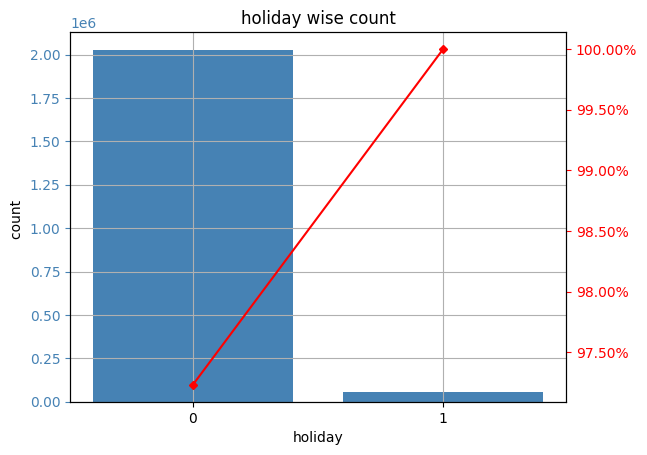

In [40]:
# Holiday wise distribution of total users
combo_chart("holiday")

<AxesSubplot: >

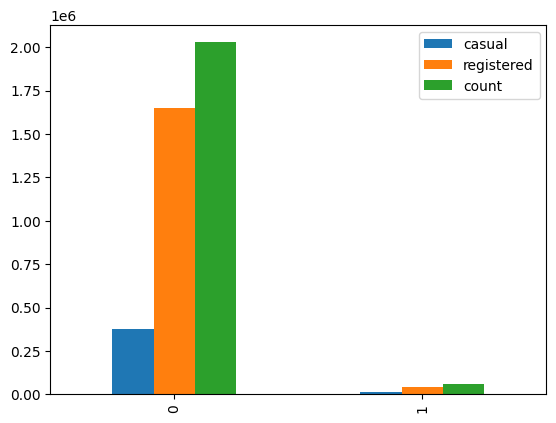

In [320]:
# Holiday wise distribution of casual, registered and total users
dgw=data.groupby("holiday")[["casual","registered","count"]].sum()
dgw.reset_index(inplace=True)
dgw.plot(kind="bar")

In [47]:
dgh=data.groupby(["holiday"])[["workingday","count"]].aggregate({"workingday":"count","count":"sum"}).reset_index()
dgh["Workday%age"]=(dgh["workingday"]/dgh["workingday"].sum())*100
dgh["count%age"]=(dgh["count"]/dgh["count"].sum())*100
dgh

,holiday,workingday,count,Workday%age,count%age
0,0,10575,2027668,97.14312,97.228067
1,1,311,57808,2.85688,2.771933


    Almost all rides are made on non-holidays. This is proportional to the number of days of actual holidays in this period.and maximum are regsitered users.

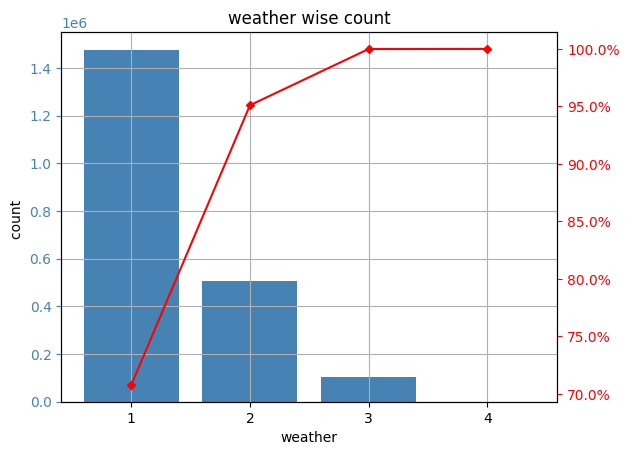

In [41]:
# Weather wise total users count.
combo_chart("weather")

##### Weather does affect the usage of bikes.
    Maximum rides are made when weather is Type 1 i.e. Clear, Few clouds, partly cloudy, partly cloudy
    Minimum rides are made when weather is Type 4 i.e. Heavy Rain + Ice Pallets + Thunderstorm + Mist,Snow + Fog


<AxesSubplot: >

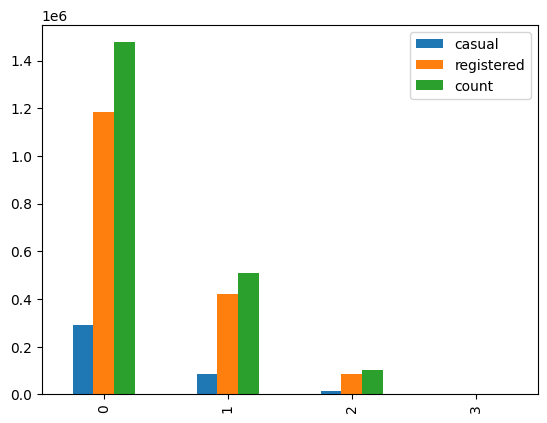

In [324]:
# Weather wise distribution of casual, registered and total users.
dgw=data.groupby("weather")[["casual","registered","count"]].sum()
dgw.reset_index(inplace=True)
dgw.plot(kind="bar")

In [170]:
data.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,spring,0,0,1,9.84,14.395,81,0.0,3,13,16


In [325]:
data["month"]=data["datetime"].dt.month
data["year"]=data["datetime"].dt.year
data["month_name"]=data["month"].apply(lambda x: calendar.month_abbr[x])
data.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,month_name
0,2011-01-01,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,Jan


In [326]:
dgym=data.pivot_table(index=["year","month","month_name"],values=["count","casual","registered"],aggfunc="sum").reset_index()
dgym=dgym[["year","month","month_name","casual","count","registered"]]
dgym.year=dgym.year.astype("str")
dgym.month=dgym.month.astype("str")
dgym

,year,month,month_name,casual,count,registered
0,2011,1,Jan,2008,23552,21544
1,2011,2,Feb,3776,32844,29068
2,2011,3,Mar,7910,38735,30825
3,2011,4,Apr,12229,50517,38288
4,2011,5,May,15865,79713,63848
5,2011,6,Jun,19600,89776,70176
6,2011,7,Jul,26145,92848,66703
7,2011,8,Aug,17580,83296,65716
8,2011,9,Sep,18311,79104,60793
9,2011,10,Oct,17159,79522,62363


In [327]:
dgy=dgym.groupby(["year"])["casual","registered","count"].sum().reset_index()
print(dgy)
print("Increase in casual percentage is ",round(((236318-155817)/(155817))*100,2),"%")
print("Increase in registered percentage is ",round(((1067179-626162)/(626162))*100,2),"%")
print("Increase in count percentage is ",round(((1303497-781979)/(781979))*100,2),"%")

   year  casual  registered    count
0  2011  155817      626162   781979
1  2012  236318     1067179  1303497
Increase in casual percentage is  51.66 %
Increase in registered percentage is  70.43 %
Increase in count percentage is  66.69 %


C:\Users\Dell\AppData\Local\Temp\ipykernel_3120\1111364731.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dgy=dgym.groupby(["year"])["casual","registered","count"].sum().reset_index()


    Growth in casual users ride in 2012 vs 2011 is minimum at 51.6% where as an overall growth of 70.43% is observed for registered users and 66.69% for total.
    
>Recommendation : Take steps to increase bike visibility and marketing to increase count of casual users.

###### Following three graphs compare 2011 vs 2012 for casual, registered, and total i.e count users

<AxesSubplot: xlabel='month_name', ylabel='casual'>

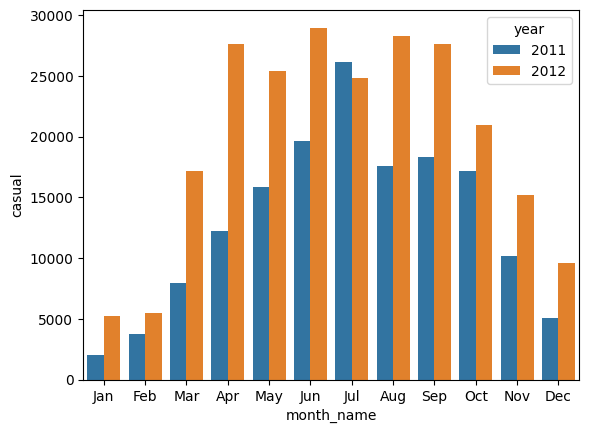

In [330]:
# Month wise comparision for casual users 
sns.barplot(x=dgym["month_name"],y=dgym["casual"],hue=dgym["year"])

<AxesSubplot: xlabel='month_name', ylabel='registered'>

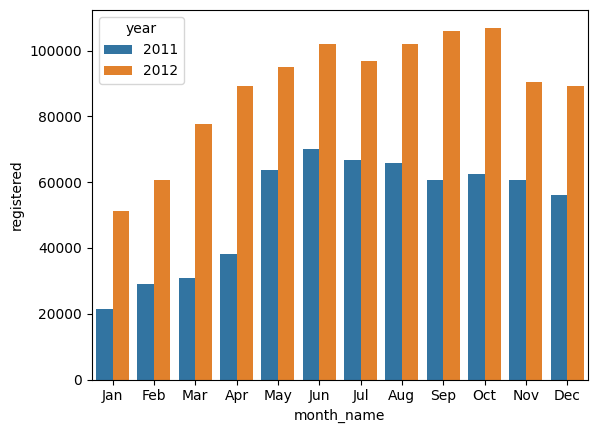

In [331]:
# Month wise comparision for registered users
sns.barplot(x=dgym["month_name"],y=dgym["registered"],hue=dgym["year"])

<AxesSubplot: xlabel='month_name', ylabel='count'>

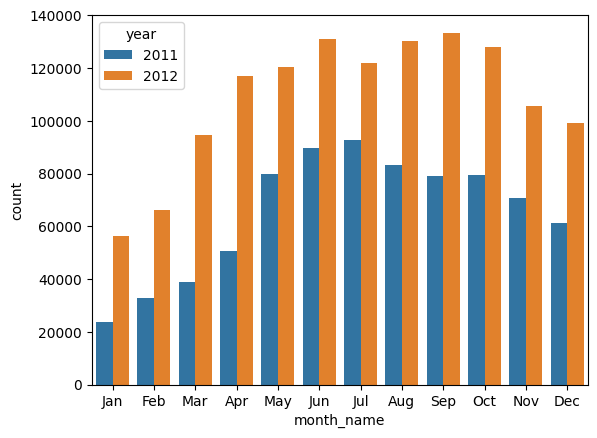

In [332]:
# Month wise comparision for Total users users
sns.barplot(x=dgym["month_name"],y=dgym["count"],hue=dgym["year"])

    As already noticed one of the reasons for decline is the general trend due to which the user count falls in the last 3 months of the year. It happened for both 2011 and 2012.

# Hypothesis Testing

# 2- Sample T-Test

    2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented.

    Step 1 : Define Null and alternate hypothesis.
> H0 : Count on weekday is equal to weekend

> Ha : Count on weekday is not equal to weekend

> H0 : mu1 = mu2

> Ha : mu1 > mu2

    Significance Level : We will consider a Confidence Interval of 95% and significance level of 0.05 i.e alpha = 0.05

In [333]:
data["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

###### Dealing with outliers.

<AxesSubplot: xlabel='workingday', ylabel='count'>

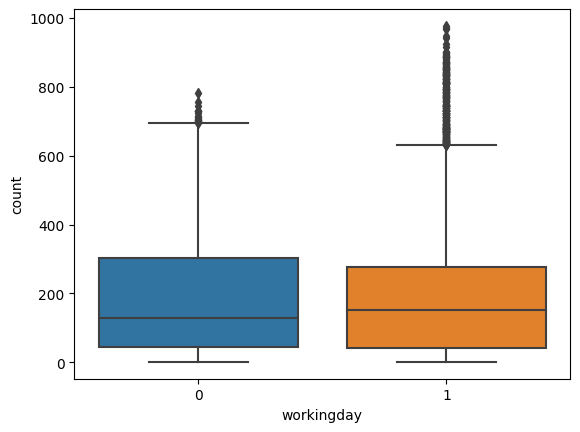

In [335]:
sns.boxplot(x=data["workingday"],y=data["count"])

    There are many outliers in both the workingdays categorical varibales. Lets remove them..

In [341]:
# Finding quantiles Q1 and q3 to aid in detecting and removing outliers.
q1=data["count"].quantile(0.25)
q3=data["count"].quantile(0.75)

    Finding interquartile range for outlier removal.

In [343]:
iqr=q3-q1
iqr

242.0

    Removing rows containing outliers.

In [357]:
data=data[(data["count"]>(q1-1.5*iqr)) & (data["count"]<(q3+1.5*iqr))]
data.shape

(10583, 15)

Counting rows for each of working day values. 
> 1 - neither weekend nor holiday.
> 0 - otherwise.


In [359]:
data["workingday"].value_counts()

1    7161
0    3422
Name: workingday, dtype: int64

<AxesSubplot: xlabel='workingday', ylabel='count'>

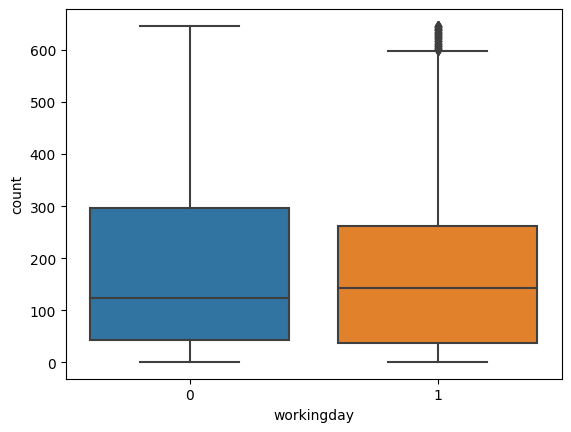

In [360]:
# PLotting boxplot to see distribution of variables.
sns.boxplot(x=data["workingday"],y=data["count"])

###### Preparing the data.

In [374]:
weekend=data[data["workingday"]=="0"]["count"]
weekday=data[data["workingday"]=="1"]["count"].sample(3422)

In [376]:
weekend.shape

(3422,)

    Calculate standard deviation for weekends and weekdays

In [379]:
weekdaySTD=round(weekday.std(),2)
weekendSTD=round(weekend.std(),2)

In [384]:
print("The standard deviation for weekend is ",weekendSTD)
print("The standard deviation for weekend is ",weekdaySTD)

The standard deviation for weekend is  163.78
The standard deviation for weekend is  151.86


    Calculating p-value. Using Ttest_ind formula as we have to compare two samples. 

In [393]:
test_stat,p_value=ttest_ind(weekday,weekend,alternative="greater")
print(test_stat)
print(p_value)

-1.9857482677445932
0.9764494348861489


    Print conclusion based on P-value:

In [394]:
if p_value<0.05:
    print("As p value",p_value,"is less than level of significanc 0.05, We reject null hypothesis")
else:
    print("As p value",p_value,"is greater than level of significanc 0.05, We Fail to reject null hypothesis")

As p value 0.9764494348861489 is greater than level of significanc 0.05, We Fail to reject null hypothesis


# ANNOVA

Check if No. of cycles rented is similar or different in different 
1. weather 
2. season 

In [395]:
data["weather"].value_counts()

1    6962
2    2770
3     850
4       1
Name: weather, dtype: int64

In [400]:
data.shape

(10583, 15)

In [404]:
data=data[~(data["weather"]=="4")]

In [405]:
data.shape

(10582, 15)

###### Since weather 3 has least number of datapoints, We take same number of datapoints for other weather as well.

In [408]:
w1=data[data["weather"]=="1"]["count"].sample(850)
w2=data[data["weather"]=="2"]["count"].sample(850)
w3=data[data["weather"]=="3"]["count"].sample(850)

In [411]:
data.groupby("weather")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0


    Defining Null and alternate Hypothesis.

H0: The mean count in different weather are equal.

Ha:  The mean count in different weather are different.

We can use ANOVA to find equality of 3 population means.One way ANOVA can be used provided equality of variance and normality are verified. 

For testing of  normality we will use the Shapiro-Wilk's test 

For testing of variance we will use Levene's test. 

# Shapiro-Wilk's Test

Defining Null and laternate Hypothesis.

H0 : Count follows Normal distribution.

Ha : Count doesn't follow normal distribution. 

In [427]:
statistic,p_value=shapiro(data["count"].sample(4999)) # n= 4999 ; As n has to be less than 5000 for accurate 
# p_value
print(statistic)
print(p_value)

0.8993124961853027
0.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_3120\1483929105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["count"].sample(4999))


<AxesSubplot: xlabel='count', ylabel='Density'>

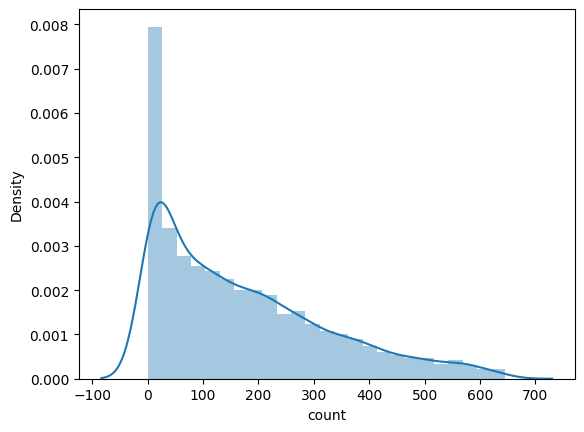

In [422]:
sns.distplot(data["count"].sample(4999))

C:\Users\Dell\AppData\Local\Temp\ipykernel_3120\3641457688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data["count"].sample(4999)))


<AxesSubplot: xlabel='count', ylabel='Density'>

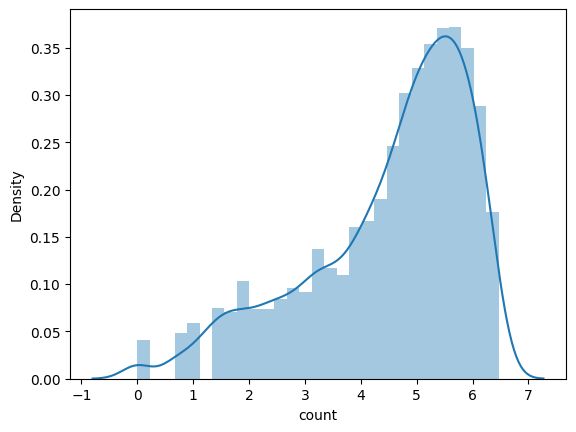

In [423]:
sns.distplot(np.log(data["count"].sample(4999)))

Lets proceed to do Levene's Test.

# Levene's Test

H0 : All count variances are equal.

Ha : All count variances are not equal.

In [428]:
statistic1,p_value=levene(w1,w2,w3)

In [430]:
print("Test statistic is",statistic1,"p_value is",p_value)

Test statistic is 52.64250636118469 p_value is 3.9586570946890983e-23


##### Since p_value is less than 0.5, We reject Null Hypothesis.

 Lets check variance of all the three samples.

In [432]:
print(w1.var(),w2.var(),w3.var())

26550.749256564817 22040.371348991892 14697.534623432408


# ANOVA

In [435]:
statistic3,p_value=f_oneway(w1,w2,w3)

In [436]:
if p_value<0.05:
    print(" We reject Null Hypothesis since p value is less than",p_value)
else:
    print(" We Fail to reject Null Hypothesis as p value is greater than",p_value)

 We reject Null Hypothesis since p value is less than 1.6053960310408531e-29


There are a total of 10,575 non-holiday vs only 311 holidays days points.
There are 7412 data points for working day vs 3474 data points for non-working days.
About 70% of bikes are used on >>working day<<. and maximum are >>regsitered users<<.
Maximum number of rides are made in fall season. and minimum in spring season.fall,summer and winter have approx 85% of total rides.
Almost all rides are made on non-holidays. This is proportional to the number of days of actual holidays in this period. and maximum are regsitered users.

Weather does affect the usage of bikes.
Maximum rides are made when weather is Type 1 i.e. Clear, Few clouds, partly cloudy, partly cloudy
Minimum rides are made when weather is Type 4 i.e. Heavy Rain + Ice Pallets + Thunderstorm + Mist,Snow + Fog
Growth in casual users ride in 2012 vs 2011 is minimum ar 51.6% where as an overall growth of 70.43% is observed for registered users and 66.69% for total.
Recommendation : Take steps to increase bike visibility and marketing to increase count of casual users.